<a href="https://colab.research.google.com/github/abigailvania99/deepLearning/blob/main/Copy_of_twitter_airline_sentiment_bert_pre_train_batch64_fullCleanMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from pytorchtools import EarlyStopping


from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Path

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Project DL II/Tweets.csv'

# EDA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(dataset_path)
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


# Preprocessing Text

In [ ]:
import re
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def cleansing(df_clean):

    df_clean = [re.sub(r'@\w+', '', i) for i in df_clean] # mention
    df_clean = [re.sub(r'@', '', i) for i in df_clean]
    df_clean = [re.sub(r'https?://\S+|www\.\S+', '', i) for i in df_clean] #link website
    df_clean = [remove_emoji(i) for i in df_clean]
    df_clean = [decontraction(i) for i in df_clean]
    df_clean = [re.sub(r'#', '', i) for i in df_clean] #tanda hastag
    df_clean=[re.sub(r"\d+",'',i )for i in df_clean] #angka
    df_clean=[re.sub(r'[^\w]', ' ', i)for i in df_clean] #non-word
    df_clean=[re.sub(r'\s+',' ',i)for i in df_clean] #whitespace
    df_clean=[i.lower() for i in df_clean] #lower case
    return df_clean

In [ ]:
df['clean_text'] = cleansing(df['text'])

In [ ]:
df['clean_text'][10]

' did you know that suicide is the second leading cause of death among teens '

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df['clean_text']
y = df['airline_sentiment']

x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size = 0.3, random_state = 42,stratify=df['airline_sentiment'])
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size = 0.5, random_state = 42,stratify=y_temp)


# One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [ ]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Pemetaan kelas ke nilai terkait:", class_mapping)

Pemetaan kelas ke nilai terkait: {'negative': 0, 'neutral': 1, 'positive': 2}


# Tokenizer

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    x_train,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=33,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    x_val,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=33,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    x_test,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=33,
    return_tensors='pt'
)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(y_test)

In [ ]:
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                            attention_masks_val,
                           labels_val)

dataset_test = TensorDataset(input_ids_test,
                            attention_masks_test,
                           labels_test)

In [ ]:
len(dataset_train)

10248

In [ ]:
len(dataset_val)

2196

In [ ]:
len(dataset_test)

2196

In [ ]:
encoded_data_train

{'input_ids': tensor([[  101, 15690,  2425,  ...,     0,     0,     0],
        [  101,  2200,  6314,  ...,     0,     0,     0],
        [  101,  2045,  2024,  ...,     0,     0,     0],
        ...,
        [  101,  4283,  2005,  ...,     0,     0,     0],
        [  101,  4165,  2204,  ...,     0,     0,     0],
        [  101,  2023,  2003,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

# Training


In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained(
                                      'bert-base-uncased',
                                      num_labels = 3,
                                      output_attentions = False,
                                      output_hidden_states = False
                                     )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 64

dataloader_train = DataLoader(
    dataset_train,
    shuffle=True,
    batch_size=batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    shuffle=False,
    batch_size=batch_size
)

dataloader_test = DataLoader(
    dataset_test,
    shuffle=False,
    batch_size=batch_size
)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.optim import lr_scheduler

In [ ]:
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
epochs = 30

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

In [ ]:
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)



In [ ]:
class EarlyStopping:
    def __init__(self, patience=10, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.trace_func is not None:
            self.trace_func(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), self.path)


In [ ]:
import torch.nn as nn

num_epochs = 30
criterion = nn.CrossEntropyLoss()

best_val_loss = float('inf')
best_model_path = "best_model.pth"
early_stopping = EarlyStopping(patience=10, delta=0.001, path='model_checkpoint.pth', trace_func=print)

history = {
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': []
}

for epoch in range(num_epochs):
    model.train()

    total_correct_train = 0
    total_samples_train = 0
    loss_train_temp=0

    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs_train = model(input_ids, attention_mask=attention_mask, labels=labels)
        logits_train = outputs_train.logits
        predictions_train = torch.argmax(logits_train, dim=1)
        loss_train = criterion(logits_train, labels)
        loss_train_temp += loss_train.item()
        loss_train.backward()
        optimizer.step()

        total_correct_train += torch.sum(predictions_train == labels).item()
        total_samples_train += labels.size(0)


    # Evaluasi pada validation set
    model.eval()
    total_correct_val = 0
    total_samples_val = 0
    val_loss = 0
    with torch.no_grad():
        for batch in dataloader_val:
            batch = tuple(b.to(device) for b in batch)
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            total_correct_val += torch.sum(predictions == labels).item()
            total_samples_val += labels.size(0)
            val_loss += criterion(outputs.logits, labels).item()

    accuracy_train = total_correct_train / total_samples_train
    accuracy_val = total_correct_val / total_samples_val

    history['train_loss'].append(loss_train_temp)
    history['train_accuracy'].append(accuracy_train)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(accuracy_val)

    print(f"Epoch {epoch + 1} - Training Accuracy: {accuracy_train}, Validation Accuracy: {accuracy_val}")

    if val_loss < best_val_loss:
      best_val_loss = val_loss
      torch.save(model.state_dict(), best_model_path)
      print(f"Epoch {epoch + 1} - Saved the best model with validation loss: {best_val_loss}")


    scheduler.step(val_loss)
    early_stopping(val_loss, model)

    if early_stopping.early_stop:
      print("Early stopping")
      break


Epoch 1 - Training Accuracy: 0.725312256049961, Validation Accuracy: 0.813752276867031
Epoch 1 - Saved the best model with validation loss: 16.591623544692993
Validation loss decreased (16.591624 --> 16.591624). Saving model...
Epoch 2 - Training Accuracy: 0.8489461358313818, Validation Accuracy: 0.8351548269581056
Epoch 2 - Saved the best model with validation loss: 15.348783686757088
Validation loss decreased (15.348784 --> 15.348784). Saving model...
Epoch 3 - Training Accuracy: 0.8820257611241218, Validation Accuracy: 0.8342440801457195
EarlyStopping counter: 1 out of 10
Epoch 4 - Training Accuracy: 0.9160811865729899, Validation Accuracy: 0.8342440801457195
EarlyStopping counter: 2 out of 10
Epoch 5 - Training Accuracy: 0.9384270101483216, Validation Accuracy: 0.8397085610200364
EarlyStopping counter: 3 out of 10
Epoch 6 - Training Accuracy: 0.9583333333333334, Validation Accuracy: 0.836976320582878
EarlyStopping counter: 4 out of 10
Epoch 7 - Training Accuracy: 0.969847775175644,

# Prediction

In [ ]:
best_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
try:
    best_model_state = torch.load('best_model.pth')
    best_model.load_state_dict(best_model_state)
except FileNotFoundError:
    print("Best model checkpoint not found. Please train the model first.")


# Evaluasi pada test set
best_model.to(device)
best_model.eval()

all_predictions = []
all_labels = []
incorrect_predictions = []

total_correct_test = 0
total_samples_test = 0
with torch.no_grad():
    for batch_idx, batch in enumerate(dataloader_test):
        batch = tuple(b.to(device) for b in batch)
        input_ids, attention_mask, labels = batch
        outputs = best_model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        total_correct_test += torch.sum(predictions == labels).item()
        total_samples_test += labels.size(0)

        incorrect_mask = predictions != labels
        incorrect_indices = torch.nonzero(incorrect_mask).squeeze() + batch_idx * batch_size
        incorrect_predictions.extend(incorrect_indices.cpu().numpy())


        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy_test = total_correct_test / total_samples_test
print(f"Test Accuracy: {accuracy_test}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test Accuracy: 0.8274134790528234


# Evaluation

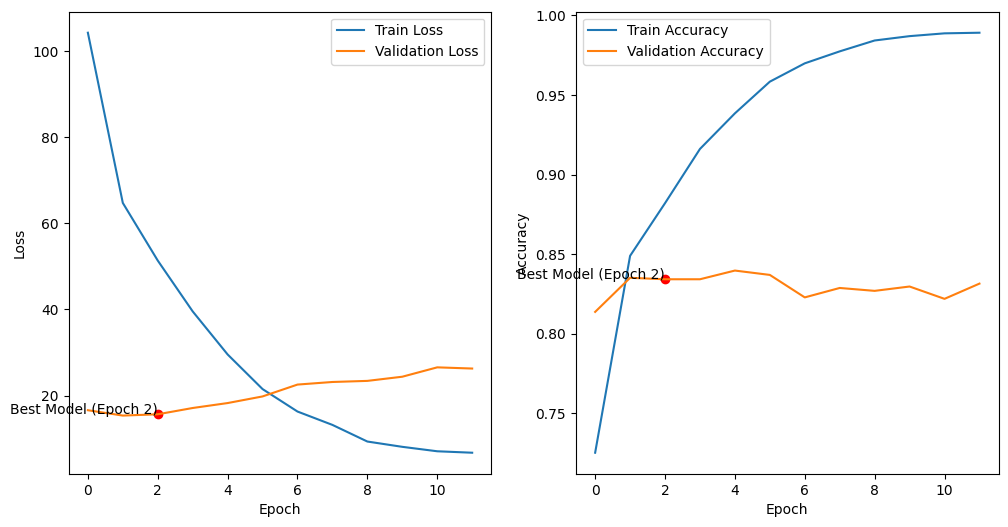

In [ ]:
import matplotlib.pyplot as plt

best_epoch = len(history['train_loss']) - 10


# Plotting
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.scatter(best_epoch, history['val_loss'][best_epoch], color='red')
plt.text(best_epoch, history['val_loss'][best_epoch], f'Best Model (Epoch {best_epoch})', color='black', fontsize=10, ha='right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.scatter(best_epoch, history['val_accuracy'][best_epoch], color='red')
plt.text(best_epoch, history['val_accuracy'][best_epoch], f'Best Model (Epoch {best_epoch})', color='black', fontsize=10, ha='right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


print("Classification Report:")
print(classification_report(all_labels, all_predictions))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1377
           1       0.74      0.56      0.64       465
           2       0.75      0.81      0.78       354

    accuracy                           0.83      2196
   macro avg       0.79      0.76      0.77      2196
weighted avg       0.82      0.83      0.82      2196

Confusion Matrix:
[[1270   64   43]
 [ 152  260   53]
 [  40   27  287]]


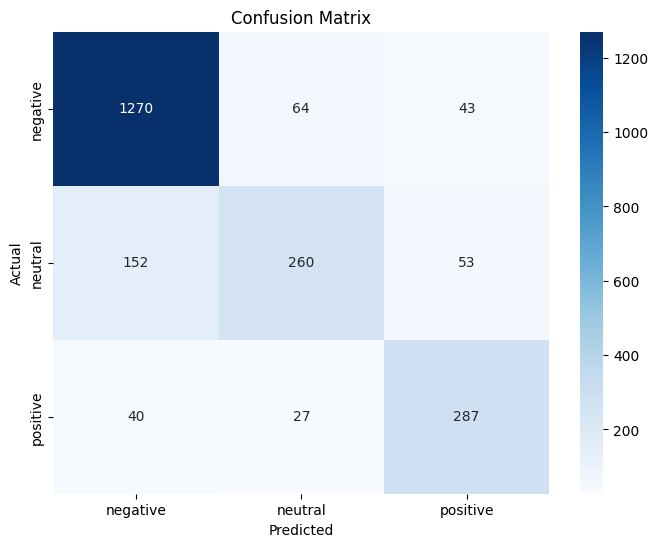

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Jumlah Data Negatif, Netral, Positif pada data Training, Testing dan Validasi

In [ ]:
class_mapping_reverse = {v: k for k, v in class_mapping.items()}

predicted_classes = [class_mapping_reverse[pred] for pred in all_predictions]
true_classes = [class_mapping_reverse[label] for label in all_labels]

train_class_counts = pd.Series(y_train).map(class_mapping_reverse).value_counts()

val_class_counts = pd.Series(y_val).map(class_mapping_reverse).value_counts()

test_class_counts = pd.Series(y_test).map(class_mapping_reverse).value_counts()

print("Jumlah sampel untuk setiap kelas pada data train:")
print(train_class_counts)

print("\nJumlah sampel untuk setiap kelas pada data val:")
print(val_class_counts)

print("\nJumlah sampel untuk setiap kelas pada data test:")
print(test_class_counts)


Jumlah sampel untuk setiap kelas pada data train:
negative    6425
neutral     2169
positive    1654
dtype: int64

Jumlah sampel untuk setiap kelas pada data val:
negative    1376
neutral      465
positive     355
dtype: int64

Jumlah sampel untuk setiap kelas pada data test:
negative    1377
neutral      465
positive     354
dtype: int64


# Teks yang salah Prediksi

In [ ]:
# for index in incorrect_predictions[:10]:
print(len(incorrect_predictions))
for index in incorrect_predictions:
    print("Teks:", x_test.iloc[index])
    print("Label Sebenarnya:", label_encoder.classes_[all_labels[index]])
    print("Prediksi Model:", label_encoder.classes_[all_predictions[index]])
    print("\n")


379
Teks:  thanks 
Label Sebenarnya: neutral
Prediksi Model: positive


Teks:  that is what i thought thanks for the clarification 
Label Sebenarnya: neutral
Prediksi Model: positive


Teks:  grkm is the file reference
Label Sebenarnya: negative
Prediksi Model: neutral


Teks:  no her lunch was over by the time she got her call answered
Label Sebenarnya: neutral
Prediksi Model: negative


Teks:  i will not have my passport in time for my trip could i still fly with photo id thingsishouldknow ifeeldumb
Label Sebenarnya: neutral
Prediksi Model: negative


Teks:  airways sees significant decline in short interest jblu wkrb news 
Label Sebenarnya: neutral
Prediksi Model: negative


Teks:  when will your phone agents be able to give the correct departure times for cun when can we checkin online for international 
Label Sebenarnya: negative
Prediksi Model: neutral


Teks:  thx just sent the dm
Label Sebenarnya: positive
Prediksi Model: neutral


Teks:  i will try to have a great week once i 